<a href="https://colab.research.google.com/github/MayerT1/Forest_Structure_Function_Module/blob/main/Step_3_Forest_Structure_Function_Module_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Export CSVs with thsi GEE Script

https://code.earthengine.google.com/ca98e825537939f29d0a7703cdf51134

guide: https://www.kaggle.com/code/sociopath00/random-forest-using-gridsearchcv

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/MyDrive/sample_partition

/content/drive/MyDrive/sample_partition


In [4]:
!ls

op_rf.csv  out.csv  testing.csv  training.csv  validation.csv


In [25]:
!pip3 install mxnet-mkl==1.6.0 numpy==1.23.1

In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

%matplotlib inline

In [7]:
train=pd.read_csv("training.csv")
test=pd.read_csv("testing.csv")

print("Train dataset has {} samples and {} attributes".format(*train.shape))
print("Test dataset has {} samples and {} attributes".format(*test.shape))

Train dataset has 4000 samples and 39 attributes
Test dataset has 4000 samples and 39 attributes


In [18]:
# test.drop([0, 39],axis=1)
test.drop(['system:index', '.geo'], axis=1, inplace=True)
test

KeyError: "['system:index', '.geo'] not found in axis"

In [19]:
test.head()

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,ndratio_A,ndratio_D,random,ratio_A,ratio_D,rh100,rh100_1,sixth,slope,wetness
0,-0.404359,-0.403206,-0.106046,-0.094519,0.106046,0.094519,-0.489418,-0.479395,0.280048,-0.245015,...,-0.313204,-0.217043,0.205210,0.522993,0.643327,12.280000,12.28,-0.029901,31.171730,-0.013677
1,-0.316379,-0.248449,0.014466,-0.024751,-0.014466,0.024751,-0.303301,-0.271563,0.181741,-0.157029,...,-0.375773,-0.262651,0.057241,0.453728,0.583969,3.370000,3.37,-0.047370,1.538928,-0.015089
2,-0.412576,-0.440464,-0.047392,-0.077408,0.047392,0.077408,-0.451147,-0.500696,0.207759,-0.194075,...,-0.287573,-0.272602,0.818806,0.553310,0.571584,13.070000,13.07,-0.027832,26.651260,-0.036331
3,-0.395017,-0.406548,-0.097712,-0.054612,0.097712,0.054612,-0.474417,-0.451156,0.267199,-0.229454,...,-0.257218,-0.257836,0.413168,0.590814,0.590033,7.567164,7.49,-0.032311,14.870021,-0.033756
4,-0.380775,-0.411326,0.078998,0.032538,-0.078998,-0.032538,-0.311136,-0.382499,0.187058,-0.222562,...,-0.330898,-0.309484,0.708975,0.502744,0.527320,17.070000,17.07,-0.033669,12.082216,-0.097926


In [38]:
train.head()

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,ndratio_A,ndratio_D,random,ratio_A,ratio_D,rh100,rh100_1,sixth,slope,wetness
0,-0.476459,-0.483751,-0.130499,-0.082585,0.130499,0.082585,-0.571429,-0.544580,0.330213,-0.284712,...,-0.237492,-0.244325,0.375833,0.616171,0.607297,12.17,12.17,-0.025443,8.962334,-0.036204
1,-0.513142,-0.506553,-0.063932,-0.094034,0.063932,0.094034,-0.558744,-0.573255,0.334227,-0.278585,...,-0.285145,-0.367666,0.489221,0.556244,0.462346,9.02,9.02,-0.026757,30.805159,-0.067350
2,-0.347756,-0.431080,-0.198843,-0.079194,0.198843,0.079194,-0.511246,-0.494425,0.279654,-0.238936,...,-0.237844,-0.281740,0.390793,0.615712,0.560379,30.37,30.37,-0.025926,24.337640,-0.036167
3,-0.464122,-0.449512,-0.094130,-0.146172,0.094130,0.146172,-0.534884,-0.558573,0.305338,-0.245688,...,-0.425485,-0.278446,0.339658,0.403031,0.564399,6.03,6.03,-0.026175,15.251116,-0.027220
4,-0.514694,-0.500345,-0.176820,-0.127935,0.176820,0.127935,-0.633830,-0.590409,0.408838,-0.285918,...,-0.248531,-0.310714,0.632521,0.601882,0.525885,29.63,29.63,-0.024789,40.856106,-0.025176


In [20]:
head_list = list(train.columns.values)
head_list

['system:index',
 'MNDWI_HLS',
 'MNDWI_LS',
 'NDBI_HLS',
 'NDBI_LS',
 'NDMI_HLS',
 'NDMI_LS',
 'NDWI_HLS',
 'NDWI_LS',
 'S2_EVI',
 'S2_MNDWI',
 'S2_NDBI',
 'S2_NDMI',
 'S2_NDVI',
 'S2_NDWI',
 'S2_SAVI',
 'SAVI_HLS',
 'SAVI_LS',
 'VH_A',
 'VH_D',
 'VV_A',
 'VV_D',
 'brightness',
 'class',
 'dem',
 'fifth',
 'fourth',
 'greenness',
 'ndratio_A',
 'ndratio_D',
 'random',
 'ratio_A',
 'ratio_D',
 'rh100',
 'rh100_1',
 'sixth',
 'slope',
 'wetness',
 '.geo']

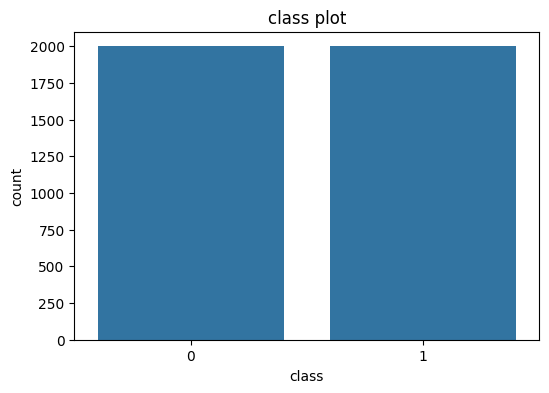

In [21]:
fig , ax = plt.subplots(figsize=(6,4))
sns.countplot(x='class', data=train)
plt.title("class plot")
plt.show()

In [22]:

del head_list[0]
del head_list[22]
del head_list[36]

head_list

['MNDWI_HLS',
 'MNDWI_LS',
 'NDBI_HLS',
 'NDBI_LS',
 'NDMI_HLS',
 'NDMI_LS',
 'NDWI_HLS',
 'NDWI_LS',
 'S2_EVI',
 'S2_MNDWI',
 'S2_NDBI',
 'S2_NDMI',
 'S2_NDVI',
 'S2_NDWI',
 'S2_SAVI',
 'SAVI_HLS',
 'SAVI_LS',
 'VH_A',
 'VH_D',
 'VV_A',
 'VV_D',
 'brightness',
 'dem',
 'fifth',
 'fourth',
 'greenness',
 'ndratio_A',
 'ndratio_D',
 'random',
 'ratio_A',
 'ratio_D',
 'rh100',
 'rh100_1',
 'sixth',
 'slope',
 'wetness']

In [23]:
corr_df=train[head_list]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

            MNDWI_HLS  MNDWI_LS  NDBI_HLS   NDBI_LS  NDMI_HLS   NDMI_LS  \
MNDWI_HLS    1.000000  0.958243 -0.351380 -0.397521  0.351380  0.397521   
MNDWI_LS     0.958243  1.000000 -0.312569 -0.415977  0.312569  0.415977   
NDBI_HLS    -0.351380 -0.312569  1.000000  0.882431 -1.000000 -0.882431   
NDBI_LS     -0.397521 -0.415977  0.882431  1.000000 -0.882431 -1.000000   
NDMI_HLS     0.351380  0.312569 -1.000000 -0.882431  1.000000  0.882431   
NDMI_LS      0.397521  0.415977 -0.882431 -1.000000  0.882431  1.000000   
NDWI_HLS     0.787608  0.777366  0.294076  0.165885 -0.294076 -0.165885   
NDWI_LS      0.804867  0.835537  0.187691  0.147503 -0.187691 -0.147503   
S2_EVI      -0.489577 -0.465692 -0.456108 -0.381585  0.456108  0.381585   
S2_MNDWI     0.882323  0.889278 -0.374094 -0.444755  0.374094  0.444755   
S2_NDBI     -0.038398 -0.052326  0.807277  0.775860 -0.807277 -0.775860   
S2_NDMI      0.038398  0.052326 -0.807277 -0.775860  0.807277  0.775860   
S2_NDVI     -0.592244 -0.

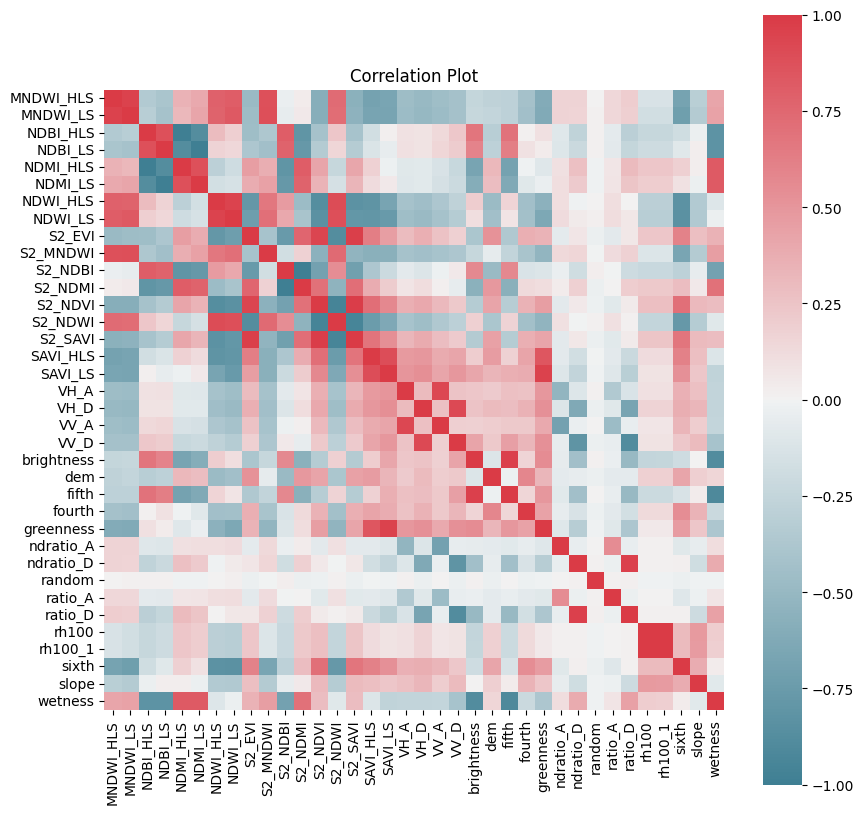

In [27]:
fig, ax =plt.subplots(figsize=(10, 10))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
# csq=chi2_contingency(pd.crosstab(train['class'], train['replace_w_categorical_variables']))
# print("P-value: ",csq[1])

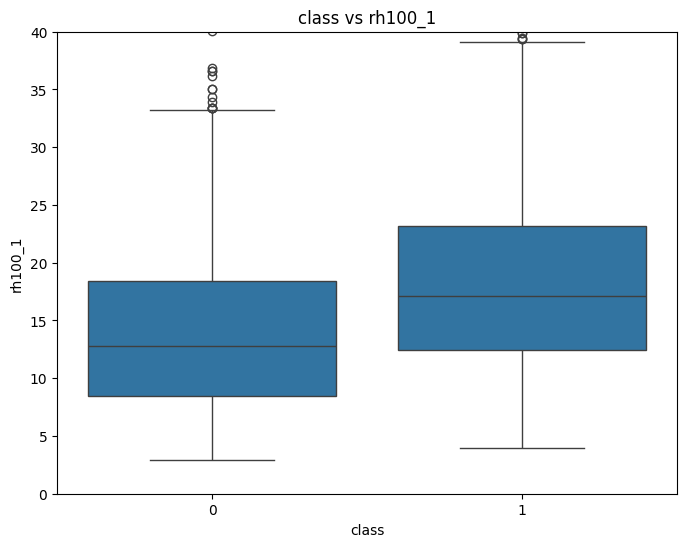

In [28]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='class',y='rh100_1', data=train)
ax.set_ylim(0,40)
plt.title("class vs rh100_1")
plt.show()

In [29]:
train['rh100_1'].describe()

,rh100_1
count,4000.000000
mean,16.254592
std,8.338358
min,2.920000
25%,10.257500
50%,14.940000
75%,20.750000
max,79.610000


# Model

In [ ]:
# model_list = list(train.columns.values)

# del model_list[0]
# del model_list[37]

# model_list

In [ ]:
df = train.drop(['system:index', '.geo'], axis=1, inplace=True)
df

In [39]:
df.head()

AttributeError: 'NoneType' object has no attribute 'head'

In [41]:
df= train

In [42]:
df.head()

,MNDWI_HLS,MNDWI_LS,NDBI_HLS,NDBI_LS,NDMI_HLS,NDMI_LS,NDWI_HLS,NDWI_LS,S2_EVI,S2_MNDWI,...,ndratio_A,ndratio_D,random,ratio_A,ratio_D,rh100,rh100_1,sixth,slope,wetness
0,-0.476459,-0.483751,-0.130499,-0.082585,0.130499,0.082585,-0.571429,-0.544580,0.330213,-0.284712,...,-0.237492,-0.244325,0.375833,0.616171,0.607297,12.17,12.17,-0.025443,8.962334,-0.036204
1,-0.513142,-0.506553,-0.063932,-0.094034,0.063932,0.094034,-0.558744,-0.573255,0.334227,-0.278585,...,-0.285145,-0.367666,0.489221,0.556244,0.462346,9.02,9.02,-0.026757,30.805159,-0.067350
2,-0.347756,-0.431080,-0.198843,-0.079194,0.198843,0.079194,-0.511246,-0.494425,0.279654,-0.238936,...,-0.237844,-0.281740,0.390793,0.615712,0.560379,30.37,30.37,-0.025926,24.337640,-0.036167
3,-0.464122,-0.449512,-0.094130,-0.146172,0.094130,0.146172,-0.534884,-0.558573,0.305338,-0.245688,...,-0.425485,-0.278446,0.339658,0.403031,0.564399,6.03,6.03,-0.026175,15.251116,-0.027220
4,-0.514694,-0.500345,-0.176820,-0.127935,0.176820,0.127935,-0.633830,-0.590409,0.408838,-0.285918,...,-0.248531,-0.310714,0.632521,0.601882,0.525885,29.63,29.63,-0.024789,40.856106,-0.025176


In [43]:
y=df['class']
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
3995,1
3996,1
3997,1
3998,1


In [45]:
x_train, x_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=42)

In [46]:
rfc=RandomForestClassifier(random_state=42)

In [85]:
# class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini',
# max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0,
# max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True,
# oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False,
# class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)


param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    # 'max_features': ['auto', 'sqrt', 'log2'],
    # 'max_depth' : [7,8],
    # 'min_samples_split': [3,4],
    'criterion' :['gini', 'entropy']
}

In [86]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5, verbose = 3)
CV_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...criterion=gini, n_estimators=10;, score=0.998 total time=   0.2s
[CV 2/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   0.3s
[CV 3/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   0.3s
[CV 4/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   0.2s
[CV 5/5] END ...criterion=gini, n_estimators=10;, score=1.000 total time=   0.2s
[CV 1/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   0.6s
[CV 2/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   0.6s
[CV 3/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   0.6s
[CV 4/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   0.4s
[CV 5/5] END ...criterion=gini, n_estimators=50;, score=1.000 total time=   0.4s
[CV 1/5] END ..criterion=gini, n_estimators=100;, score=1.000 total time=   0.9s
[CV 2/5] END ..criterion=gini, n_estimators=100;

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [10, 50, 100, 150, 200]},
             verbose=3)

In [87]:
print(CV_rfc.best_score_)
print(CV_rfc.best_params_)
print(CV_rfc.best_estimator_)

1.0
{'criterion': 'gini', 'n_estimators': 50}
RandomForestClassifier(n_estimators=50, random_state=42)


In [88]:
from sklearn.metrics import classification_report, confusion_matrix

grid_predictions = CV_rfc.predict(x_train)

# print classification report
print(classification_report(y_train, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1378
           1       1.00      1.00      1.00      1422

    accuracy                           1.00      2800
   macro avg       1.00      1.00      1.00      2800
weighted avg       1.00      1.00      1.00      2800



In [89]:
sorted(CV_rfc.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_criterion',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [90]:
cv_df = pd.DataFrame(CV_rfc.cv_results_)
cv_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.228447,0.044193,0.006995,0.002981,gini,10,"{'criterion': 'gini', 'n_estimators': 10}",0.998214,1.0,1.0,1.000000,1.0,0.999643,0.000714,9
1,0.518672,0.085630,0.011054,0.002403,gini,50,"{'criterion': 'gini', 'n_estimators': 50}",1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
2,0.869772,0.015723,0.014792,0.000115,gini,100,"{'criterion': 'gini', 'n_estimators': 100}",1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
3,1.432625,0.178776,0.022479,0.002526,gini,150,"{'criterion': 'gini', 'n_estimators': 150}",1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
4,1.844609,0.248410,0.026632,0.000645,gini,200,"{'criterion': 'gini', 'n_estimators': 200}",1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
5,0.101900,0.006033,0.004379,0.000636,entropy,10,"{'criterion': 'entropy', 'n_estimators': 10}",1.000000,1.0,1.0,0.996429,1.0,0.999286,0.001429,10
6,0.525824,0.067190,0.009965,0.001542,entropy,50,"{'criterion': 'entropy', 'n_estimators': 50}",1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
7,1.254702,0.190899,0.016755,0.002662,entropy,100,"{'criterion': 'entropy', 'n_estimators': 100}",1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
8,1.518794,0.013134,0.023237,0.003815,entropy,150,"{'criterion': 'entropy', 'n_estimators': 150}",1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1
9,2.308580,0.375444,0.029410,0.004281,entropy,200,"{'criterion': 'entropy', 'n_estimators': 200}",1.000000,1.0,1.0,1.000000,1.0,1.000000,0.000000,1


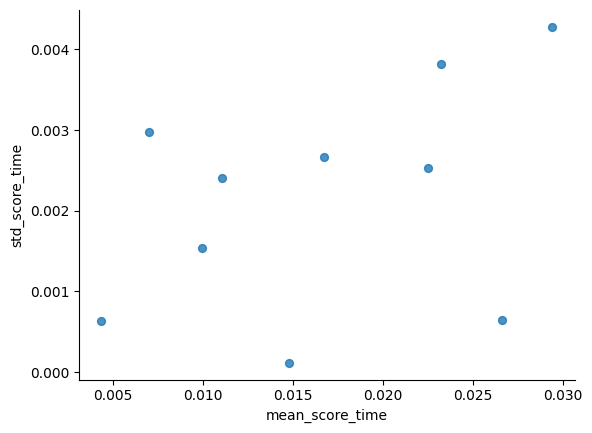

In [91]:
# @title mean_score_time vs std_score_time

from matplotlib import pyplot as plt
cv_df.plot(kind='scatter', x='mean_score_time', y='std_score_time', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

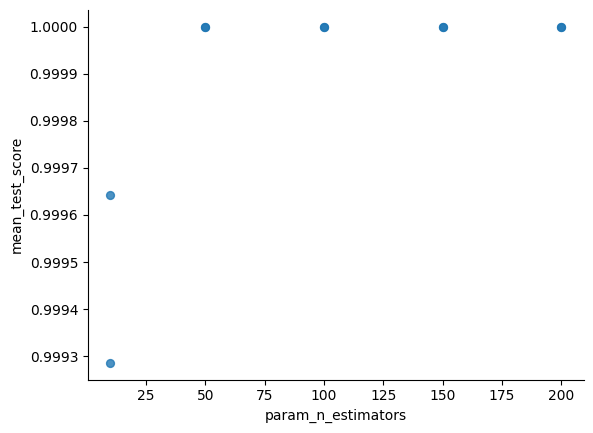

In [92]:
from matplotlib import pyplot as plt
cv_df.plot(kind='scatter', x='param_n_estimators', y='mean_test_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

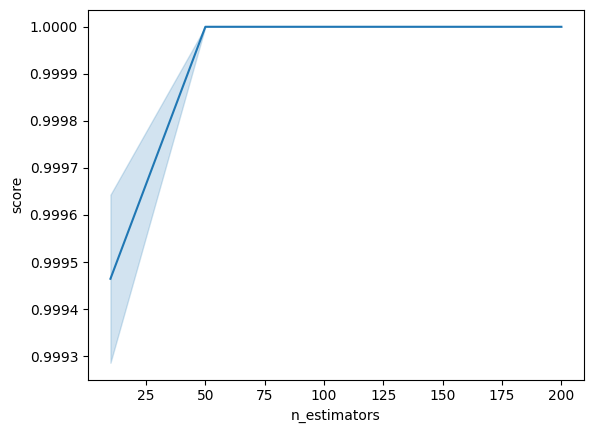

In [93]:

# sns.lineplot(data=cv_df, x='param_n_estimators', y='mean_test_score') #hue='param_kernel'
# plt.show()


#plot logreg scores
logreg_cv_df = pd.DataFrame(CV_rfc.cv_results_['params'])

logreg_cv_df['score'] = CV_rfc.cv_results_['mean_test_score']

sns.lineplot(data=logreg_cv_df, x= 'n_estimators', y='score') #hue='param_kernel'
plt.show()

<ipython-input-94-db42bc1c0950>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(cv_df, x='mean_test_score', y='param_criterion', inner='stick', palette='Dark2')


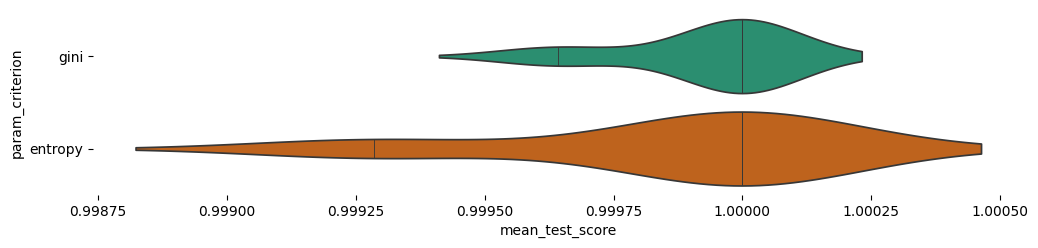

In [94]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(cv_df['param_criterion'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(cv_df, x='mean_test_score', y='param_criterion', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

# Run the model

In [103]:
print(CV_rfc.best_params_)
model_input = CV_rfc.best_params_

rfc1=RandomForestClassifier(random_state=42, min_samples_split= 3, n_estimators= 50, max_depth=7, criterion='gini', verbose = 3)


{'criterion': 'gini', 'n_estimators': 50}


In [104]:
rfc1.fit(x_train, y_train)

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50


[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    1.1s


building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


RandomForestClassifier(max_depth=7, min_samples_split=3, n_estimators=50,
                       random_state=42, verbose=3)

In [105]:
pred=rfc1.predict(x_test)

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s


In [106]:
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  1.0


In [107]:
op_rf=rfc1.predict(test)

[Parallel(n_jobs=1)]: Done  31 tasks      | elapsed:    0.0s


In [108]:
op=pd.DataFrame(test['rh100_1'])
op['class']=op_rf

In [109]:
op.to_csv("op_rf.csv", index=False)

In [110]:
from pathlib import Path
filepath = Path('/content/drive/MyDrive/sample_partition/out.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
df.to_csv(filepath)